In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\DELL\\Documents\\supply_chain.csv")
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [3]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

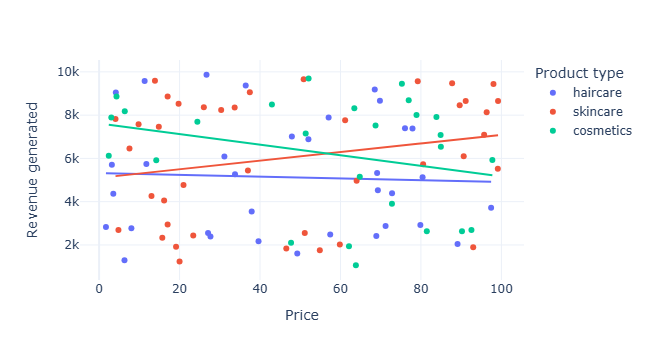

In [9]:
fig = px.scatter(df, x = 'Price',
                 y = 'Revenue generated',
                 color = 'Product type',
                 hover_data = ["Number of products sold"],
                 trendline = "ols")
fig.show()

In [5]:
sales_data = df.groupby('Product type')['Number of products sold'].sum().reset_index()
sales_data

,Product type,Number of products sold
0,cosmetics,11757
1,haircare,13611
2,skincare,20731


In [ ]:
#pie_chart = px.pie(sales_data , values = 'Number of products sold',
#                  names = 'Pdouct type',)

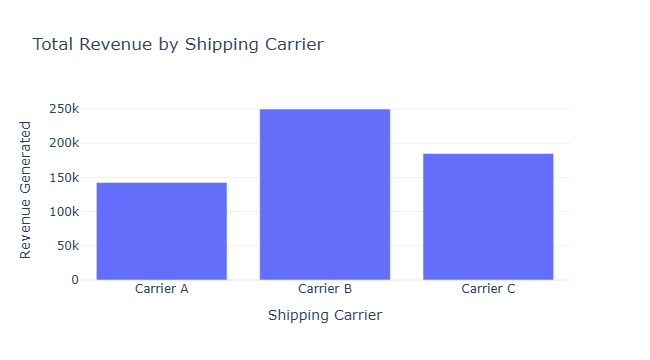

In [11]:
total_revenue = df.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Shipping carriers'],
                    y = total_revenue['Revenue generated']))
fig.update_layout(title = 'Total Revenue by Shipping Carrier',
                 xaxis_title = 'Shipping Carrier',
                 yaxis_title = 'Revenue Generated')
fig.show()

In [12]:
avg_lead_time = df.groupby('Product type')['Lead time'].mean().reset_index()
avg_lead_time

,Product type,Lead time
0,cosmetics,13.538462
1,haircare,18.705882
2,skincare,18.000000


In [13]:
avg_manufacturing_costs = df.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time, avg_manufacturing_costs,
                 on = 'Product type')
result.rename(columns = {'Lead time':'Average Lead Time',
                        'Manufacturing costs': 'Average Manufacturing Costs'},
             inplace = True)
print(result)

  Product type  Average Lead Time  Average Manufacturing Costs
0    cosmetics          13.538462                    43.052740
1     haircare          18.705882                    48.457993
2     skincare          18.000000                    48.993157
